# Projet Machine learning

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lecture du csv

In [17]:
df = pd.read_csv("processed.csv")

df.head()

,Start,Diver,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Category Event,Month,Experience Dive,Experience Discipline
0,1,Tasos Grillakis (GRC),1,0,33,23 m,YELLOW,12.0,-,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0
1,2,Antonis Papantonatos (GRC),1,0,55,47 m,YELLOW,38.0,-,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0
2,3,Dimitris Koumoulos (GRC),1,1,55,55 m,WHITE,55.0,-,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0
3,4,Christos Papadopoulos (GRC),1,2,55,55 m,WHITE,55.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0
4,5,Anna Chalari (GRC),0,2,15,15 m,WHITE,15.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0


In [27]:

# Assurez-vous que la colonne "Day" est au format datetime
df['Day'] = pd.to_datetime(df['Day'])

# Créer une nouvelle colonne "Year" en extrayant l'année de la colonne "Day"
df['Year'] = df['Day'].dt.year

# Afficher le dataframe avec la nouvelle colonne "Year"
df.head()


,Start,Diver,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Category Event,Month,Experience Dive,Experience Discipline,Year
0,1,Tasos Grillakis (GRC),1,0,33,23 m,YELLOW,12.0,-,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0,2016
1,2,Antonis Papantonatos (GRC),1,0,55,47 m,YELLOW,38.0,-,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0,2016
2,3,Dimitris Koumoulos (GRC),1,1,55,55 m,WHITE,55.0,-,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0,2016
3,4,Christos Papadopoulos (GRC),1,2,55,55 m,WHITE,55.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0,2016
4,5,Anna Chalari (GRC),0,2,15,15 m,WHITE,15.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other,7,0,0,2016


## Visualisation de données

Dans ces visualisations, nous ne prendrons pas en compte les années précédent 2000 car de 1984 à 1999 seuls des records du monde sont inscrits dans les tables, ce qui équivaut à très peu de données. 

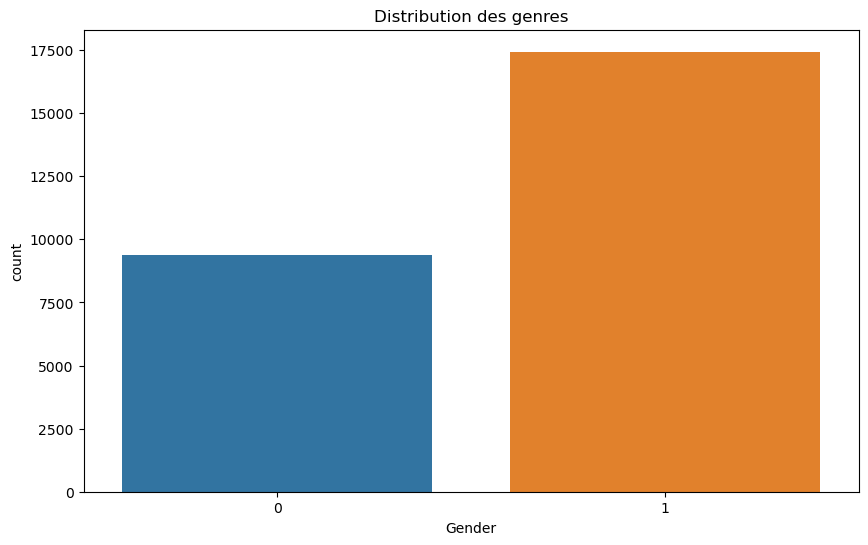

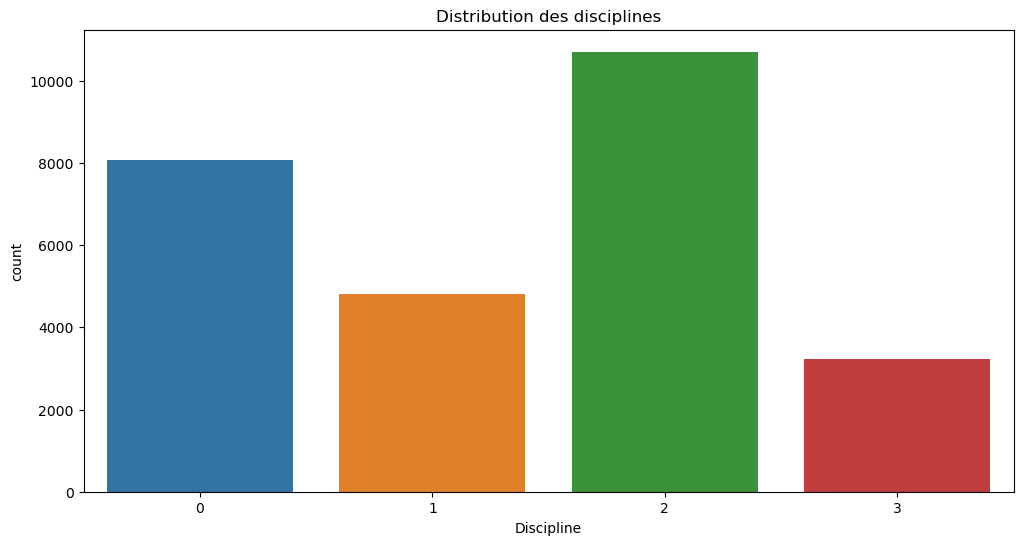

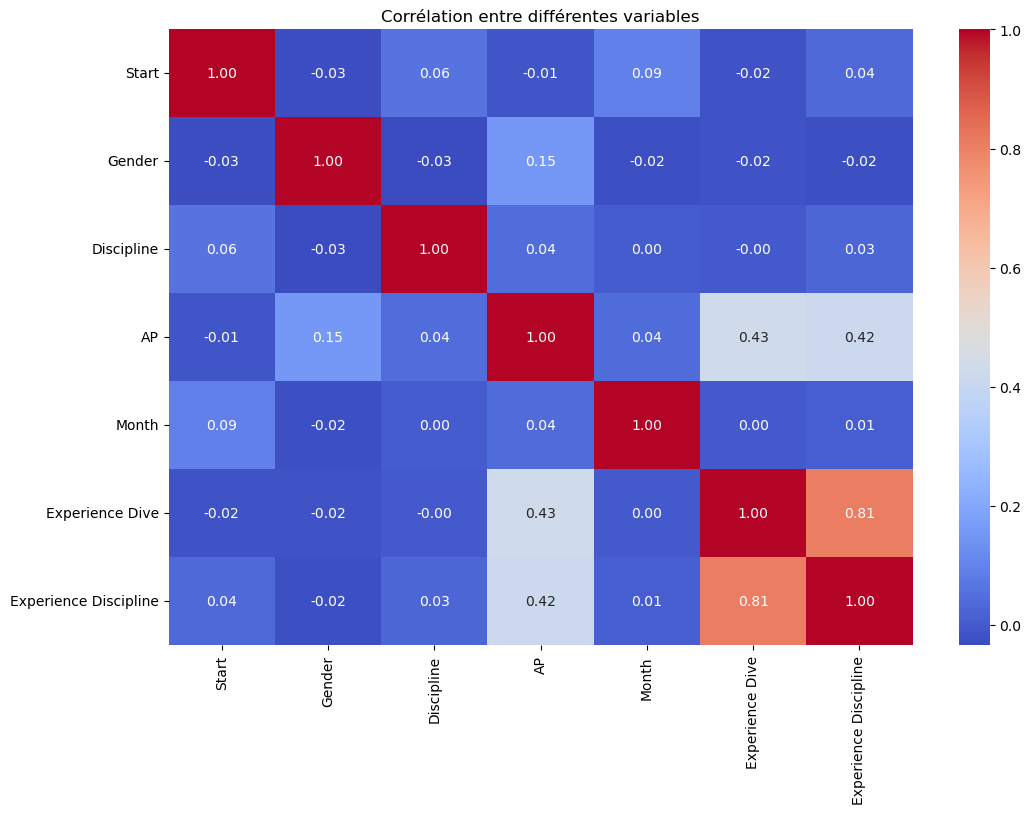

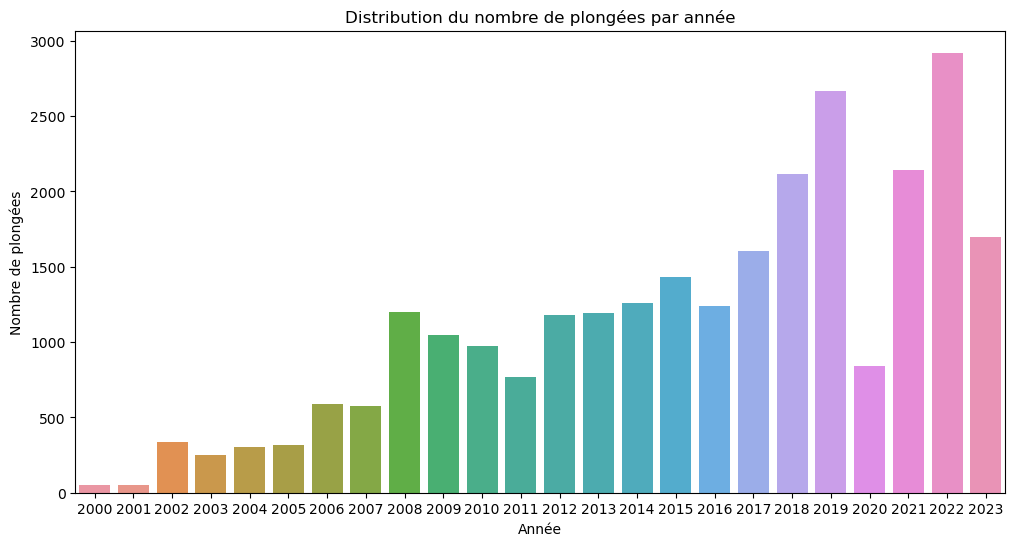

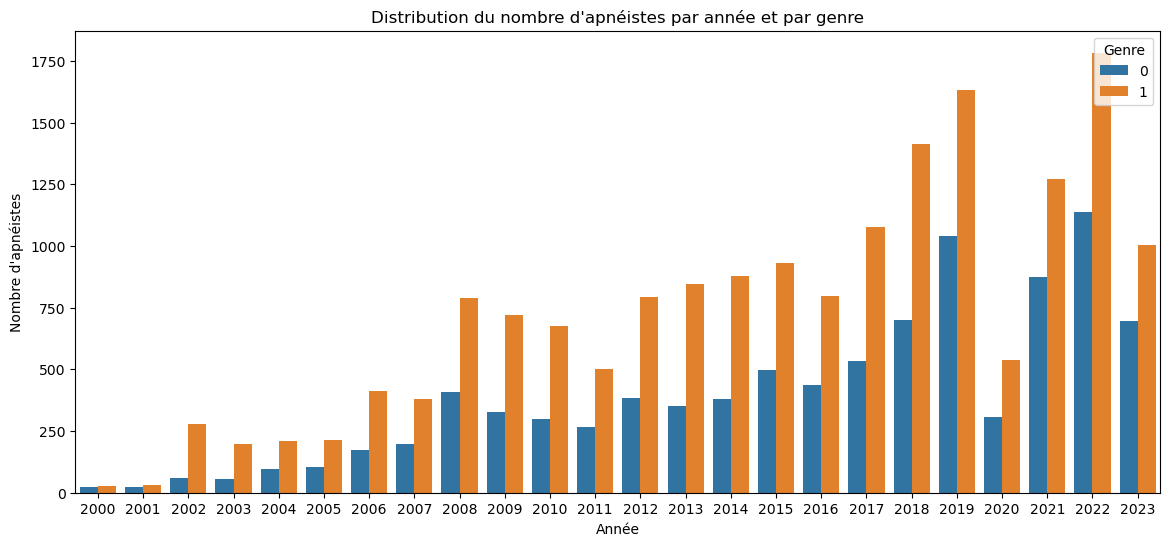

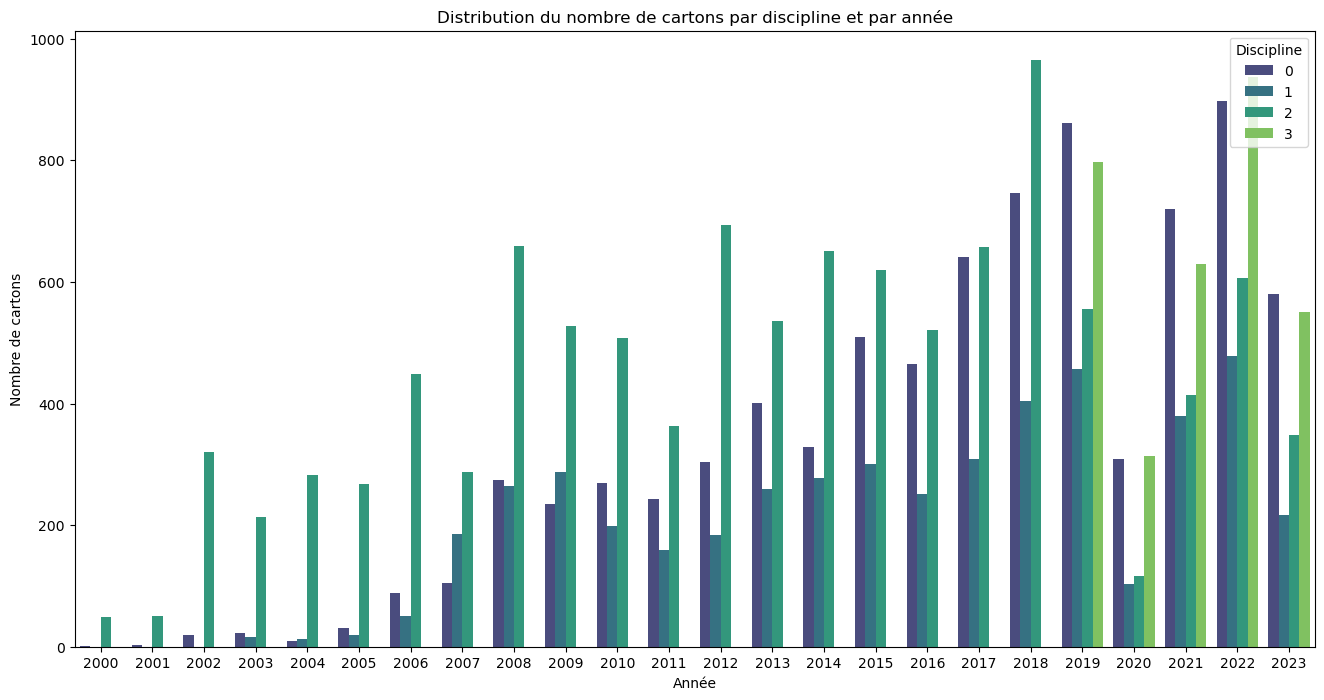

<Figure size 1600x800 with 0 Axes>

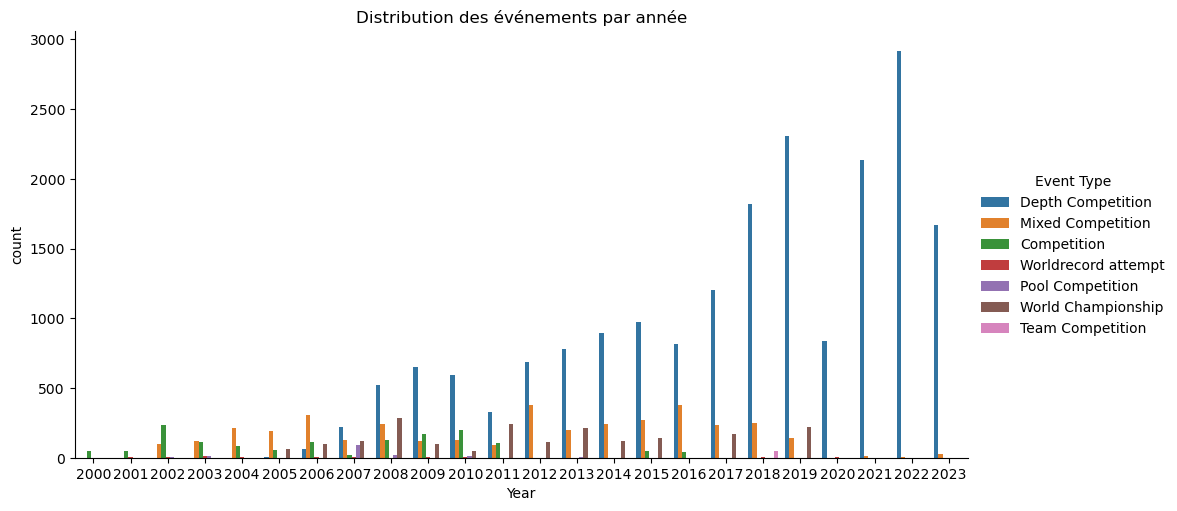

In [33]:
# Graphique à barres pour la distribution des genres
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution des genres')
plt.show()

# Graphique à barres pour la distribution des disciplines
plt.figure(figsize=(12, 6))
sns.countplot(x='Discipline', data=df)
plt.title('Distribution des disciplines')
plt.show()

# Corrélation entre différentes variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélation entre différentes variables')
plt.show()


# Assurez-vous que la colonne "Year" est de type catégorie avec l'ordre spécifié
years_order = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
df['Year'] = pd.Categorical(df['Year'], categories=years_order, ordered=True)

#  Distribution du nombre de plongées par année
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution du nombre de plongées par année')
plt.xlabel('Année')
plt.ylabel('Nombre de plongées')
plt.show()

# Distribution du nombre d'apnéistes par année par genre
plt.figure(figsize=(14, 6))
sns.countplot(x='Year', hue='Gender', data=df)
plt.title('Distribution du nombre d\'apnéistes par année et par genre')
plt.xlabel('Année')
plt.ylabel('Nombre d\'apnéistes')
plt.legend(title='Genre', loc='upper right')
plt.show()

# Distibution du nombre de cartons blancs jaunes rouges par discipline et par année
plt.figure(figsize=(16, 8))
sns.countplot(x='Year', hue='Discipline', hue_order=df['Discipline'].unique(), palette='viridis', data=df, dodge=True)
plt.title('Distribution du nombre de cartons par discipline et par année')
plt.xlabel('Année')
plt.ylabel('Nombre de cartons')
plt.legend(title='Discipline', loc='upper right')
plt.show()

plt.figure(figsize=(16, 8))
sns.catplot(x='Year', hue='Event Type', kind='count', data=df, aspect=2)
plt.title('Distribution des événements par année')
plt.show()
